In [151]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [152]:
df=pd.read_csv("homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [153]:
from sklearn import preprocessing

sx=preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler()

scaled_x=sx.fit_transform(df.drop("price",axis="columns"))
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

👇 in below code 

The .values.reshape(df.shape[0], 1) part is used to reshape the values of the column "price" into a 2D array before passing it to the MinMaxScaler

The reason for reshaping to a 2D array is that many scikit-learn functions, including MinMaxScaler, expect input data to be in a 2D array format, where each row represents a sample and each column represents a feature. Even if you have only one feature (one column), scikit-learn expects it to be in 2D format.

In [154]:
scaled_y=sy.fit_transform(df["price"].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

**V Bleow**

in Line 9, scaled_x.T: Here, scaled_x represents the input features matrix, where each row corresponds to a sample and each column corresponds to a feature. .T is the transpose operation, which flips the matrix over its diagonal, exchanging the rows and columns. This is done because the dot product operation expects the second array to have the same number of dimensions as the number of dimensions of the first array's last axis.

In [163]:
# Define a function for batch gradient descent algorithm
def batch_gradient_descent(x, y_true, epochs, learning_rate=0.01):

    # Calculate the number of features in the input data
    number_of_feature = x.shape[1]

    # Initialize the weights as an array of ones with the same number of features
    w = np.ones(shape=(number_of_feature))

    # Initialize the bias parameter to 0
    b = 0

    # Get the total number of samples in the input data
    total_samples = x.shape[0]

    # Initialize empty lists to store the cost and epoch values
    cost_list = []
    epoch_list = []

    # Iterate over the specified number of epochs
    for i in range(epochs):
        # Predict the output values using the current weights and bias
        y_predicted = np.dot(w, scaled_x.T) + b  # w1 * feature1 + w2 * feature2 + ... + bias

        # Calculate the gradients for weights and bias using the gradient descent formula
        w_grad = -(2 / total_samples) * (x.T.dot(y_true - y_predicted))
        b_grad = -(2 / total_samples) * np.sum(y_true - y_predicted)

        # Update the weights and bias using the learning rate and gradients
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        # Calculate the cost, which is the mean squared error
        cost = np.mean(np.square(y_true - y_predicted))

        # Record the value of cost & epochs at intervals of 10 to draw their graph
        if i % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)

    # Return the updated weights, bias, cost, cost list, and epoch list
    return w, b, cost, cost_list, epoch_list

# Call the batch_gradient_descent function with input data and parameters
w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],), 500)

# Print the final values of weights, bias, and cost
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

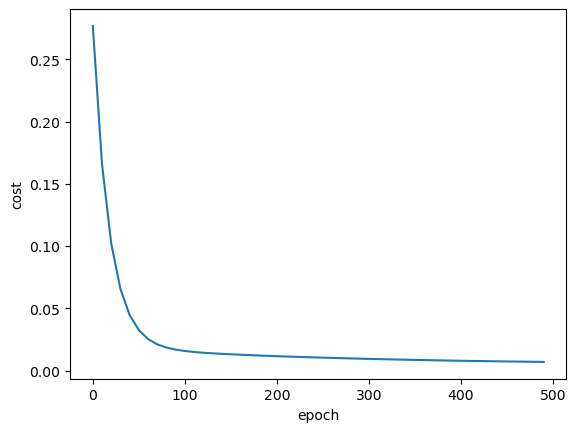

In [164]:
# plotting chart to see how my Cost reduce with number of epoch
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [166]:
def predict(area, bedroom, w, b):
    # Scale the input features (area and bedroom) using the same scaling factors used during training
    # This [0] tells Python to take the first (and only) set of scaled features from the array, which corresponds to only one house.
    scaled_x = sx.transform([[area, bedroom]])[0]
    
    # Use the learned weights (w) and bias (b) to predict the price
    # Multiply each scaled input feature by its corresponding weight, add the bias, and calculate the predicted price
    scaled_price = w[0] * scaled_x[0] + w[1] * scaled_x[1] + b
    
    # Reverse the scaling to get the predicted price in the original scale
    #[0]: This gets the first (and only) prediction from the array, so now you have [scaled_price].
    #[0]: This gets the actual price from the prediction, so you end up with scaled_price, which is the predicted price of your house in the original scale.
    predicted_price = sy.inverse_transform([[scaled_price]])[0][0]
    
    return predicted_price

# Call the predict function with the input features (area=2600, bedroom=4) and the learned weights (w) and bias (b)
predict(2600, 4, w, b)


/Users/abhishek/tensorflow-test/env/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [183]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    
    number_of_features = X.shape[1]  # Determine the number of features in the input data.
    w = np.ones(shape=(number_of_features))  # Initialize weights with ones.
    b = 0  # Initialize bias to zero.
    total_samples = X.shape[0]  # Total number of samples in the input data.
    
    cost_list = []  # Initialize an empty list to store costs.
    epoch_list = []  # Initialize an empty list to store epochs.
    
    for i in range(epochs):  # Loop through the specified number of epochs.
        random_index = random.randint(0, total_samples - 1)  # Select a random index.
        sample_x = X[random_index]  # Select the feature values for the random sample.
        sample_y = y_true[random_index]  # Select the true target value for the random sample.
        
        y_predicted = np.dot(w, sample_x.T) + b  # Predict the target value using current weights and bias.
    
        w_grad = -(2/total_samples) * (sample_x.T.dot(sample_y - y_predicted))  # Compute gradient of weights.
        b_grad = -(2/total_samples) * (sample_y - y_predicted)  # Compute gradient of bias.
        
        w = w - learning_rate * w_grad  # Update weights using gradient descent.
        b = b - learning_rate * b_grad  # Update bias using gradient descent.
        
        cost = np.square(sample_y - y_predicted)  # Calculate the cost for the current sample.
        
        if i % 100 == 0:  # Store cost and epoch at intervals of 100.
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list  # Return optimized weights, bias, final cost, and lists of costs and epochs.

# Perform stochastic gradient descent on scaled input data and reshape target values.
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],), 10000)

# Print optimized weights, bias, and final cost.
w_sgd, b_sgd, cost_sgd


(array([0.70772909, 0.67400862]), -0.22872402303081818, 0.004139123830550499)

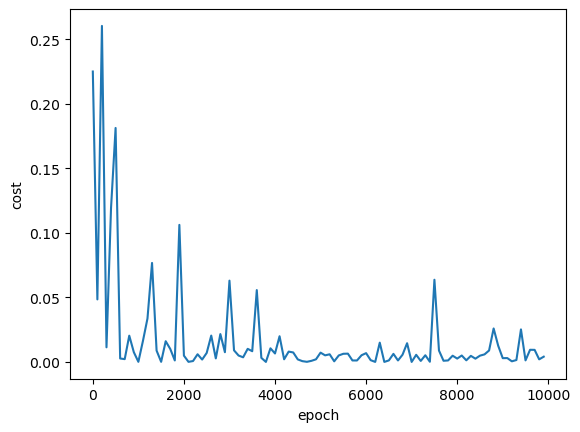

In [184]:
# plotting chart to see how my Cost reduce with number of epoch
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [176]:
predict(2600,4,w_sgd,b_sgd)

/Users/abhishek/tensorflow-test/env/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.98187381371054